# Multi-Layer Regression

* In this notebook a mutli-layer model is trained to predict $\sin{x}$
* The class `PolynomialModel` inherits from `torch.nn.Module`
* it is trained using `torch.optim`

In [360]:
import typing
from typing import Any, Union, Optional, List, Dict

import math
import numpy as np

import matplotlib.pyplot as plt

import torch
from torch import Tensor
from torch.nn import Module, MSELoss, ModuleList, Sigmoid, ReLU, Identity, Tanh
from torch.optim import SGD, Optimizer

In [361]:
class MultiLayerModule (Module):
    layers: ModuleList
    layer_sizes: int

    def __init__(self, layer_sizes: List[int]):
        super().__init__()
        layer_sizes = [1] + layer_sizes + [1]
        self.layer_sizes = layer_sizes
        self.layers = ModuleList()
        for i in range(1, len(layer_sizes)):
            layer = Layer(layer_sizes[i-1], layer_sizes[i], activation_function=(None if i != len(layer_sizes)-1 else Identity()))
            self.layers.append(layer)

    def forward(self, x: Tensor) -> Tensor:
        x = x.unsqueeze(-1).unsqueeze(-1)
        for layer in self.layers:
            x = layer(x)
        return x.squeeze(-1).squeeze(-1)


class Layer (Module):
    weights: Tensor
    activation_function: Module

    def __init__(self, input_size: int, output_size: int, activation_function: Optional[Module] = None):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.rand(
            (1, input_size, output_size), dtype=torch.float, requires_grad=True))
        if activation_function is None: activation_function = Tanh()
        self.activation_function = activation_function
        print(self.activation_function._get_name())

    def forward(self, x: Tensor) -> Tensor:
        return self.activation_function(x @ self.weights)



In [362]:
def fit(model: Module, x: Tensor, y: Tensor, epochs: int = 2000, criterion: Optional[Module] = None, optimizer: Optional[Optimizer] = None,
        lr: float = 1e-6) -> np.ndarray:

    if (criterion is None):
        criterion = MSELoss(reduction='sum')
    if (optimizer is None):
        optimizer = SGD(model.parameters(), lr=lr)

    loss_history: np.ndarray = np.array([])

    for t in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        if t % 10 == 0:
            loss_history = np.append(loss_history, loss.detach().numpy())
            print(t, loss_history[-1])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return loss_history

In [363]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype=torch.float)
y = torch.sin(x)

In [364]:
m: Module = MultiLayerModule([16,32,64,32,16])

Tanh
Tanh
Tanh
Tanh
Tanh
Identity


0 139256.34375
10 37235.62109375
20 10058.369140625
30 2818.639404296875
40 890.0516967773438
50 376.29638671875
60 239.43751525878906
70 202.97987365722656
80 193.26788330078125
90 190.68069458007812


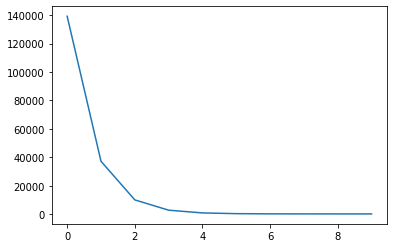

In [365]:
plt.plot(fit(m,x,y, lr=1e-6, epochs=100))

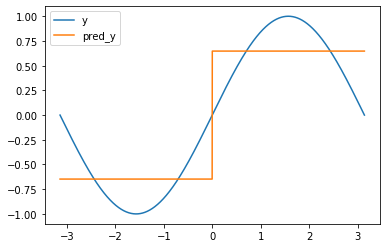

In [366]:
plt.plot(x, y, label="y")
plt.plot(x, m(x).detach(), label="pred_y")
plt.legend()